In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [287]:
dataset_train = pd.read_csv('rawdata.csv')

In [289]:
dataset_train.isnull().sum().sum()

95

In [290]:
dataset_train.head(5)

,Date,Temp,Rain,NO3,PH
0,1/1/2001,30.5,8.4,0.1,7.0
1,1/2/2001,30.2,65.8,1.0,6.8
2,1/3/2001,31.5,0.0,0.2,6.9
3,1/4/2001,31.6,93.5,0.1,7.0
4,1/5/2001,31.9,0.5,0.3,7.0


In [12]:
df = dataset_train.mask(dataset_train==0).fillna(dataset_train.mean())
df.to_csv('cleandata.csv', index=False)

C:\Users\Dilan Weerasinghe\.conda\envs\ml_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    221 non-null    object 
 1   Temp    221 non-null    float64
 2   Rain    221 non-null    float64
 3   NO3     221 non-null    float64
 4   PH      221 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.8+ KB


In [75]:
training_set  = df.iloc[:, 1:3].values

In [76]:
training_set

array([[30.5       ,  8.4       ],
       [30.2       , 65.8       ],
       [31.5       , 12.00357143],
       [31.6       , 93.5       ],
       [31.9       ,  0.5       ],
       [30.2       , 78.2       ],
       [28.2       , 23.5       ],
       [27.4       , 12.00357143],
       [29.8       , 12.00357143],
       [29.5       ,  4.9       ],
       [28.5       , 12.7       ],
       [29.3       ,  2.        ],
       [28.5       , 19.5       ],
       [26.3       ,  9.5       ],
       [30.4       ,  6.5       ],
       [29.5       , 45.        ],
       [31.9       , 12.00357143],
       [30.2       , 14.5       ],
       [28.2       , 12.00357143],
       [27.4       , 12.00357143],
       [29.8       , 12.00357143],
       [29.5       , 73.5       ],
       [28.5       , 59.2       ],
       [28.1       , 21.5       ],
       [27.3       , 17.        ],
       [26.3       , 16.5       ],
       [30.4       ,  1.6       ],
       [29.5       , 69.5       ],
       [31.9       ,

In [64]:
df_col = df.columns.tolist()
df_col

['Date', 'Temp', 'Rain', 'NO3', 'PH']

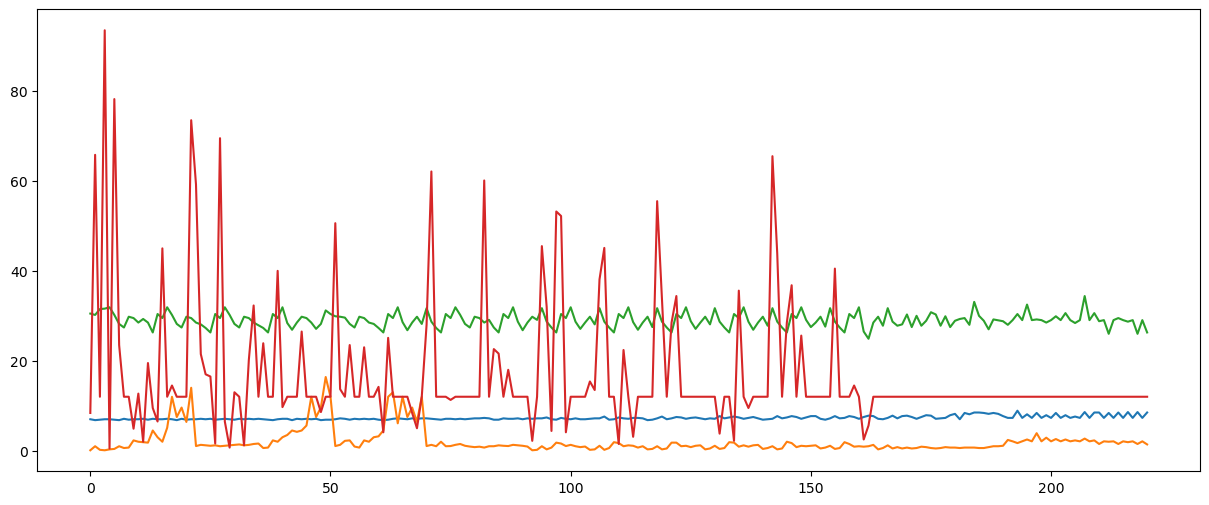

In [298]:
plt.figure(figsize=(15, 6))
df['PH'].plot();
df['NO3'].plot();
df['Temp'].plot();
df['Rain'].plot();


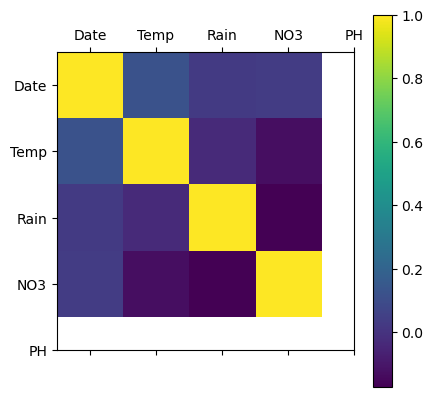

In [58]:
#Analysing relationship between different features
cor_cols = df_col
plt.matshow(df.corr())
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()

In [189]:
sc = MinMaxScaler(feature_range =(0,1))
training_set_scaled =sc.fit_transform(training_set)

In [291]:
training_set_scaled

array([[0.58947368, 0.08494624],
       [0.55789474, 0.70215054],
       [0.69473684, 0.12369432],
       [0.70526316, 1.        ],
       [0.73684211, 0.        ],
       [0.55789474, 0.83548387],
       [0.34736842, 0.24731183],
       [0.26315789, 0.12369432],
       [0.51578947, 0.12369432],
       [0.48421053, 0.04731183],
       [0.37894737, 0.1311828 ],
       [0.46315789, 0.01612903],
       [0.37894737, 0.20430108],
       [0.14736842, 0.09677419],
       [0.57894737, 0.06451613],
       [0.48421053, 0.47849462],
       [0.73684211, 0.12369432],
       [0.55789474, 0.15053763],
       [0.34736842, 0.12369432],
       [0.26315789, 0.12369432],
       [0.51578947, 0.12369432],
       [0.48421053, 0.78494624],
       [0.37894737, 0.6311828 ],
       [0.33684211, 0.22580645],
       [0.25263158, 0.17741935],
       [0.14736842, 0.17204301],
       [0.57894737, 0.01182796],
       [0.48421053, 0.74193548],
       [0.73684211, 0.06451613],
       [0.55789474, 0.00215054],
       [0.

In [190]:
#Creating a window for previous data
def to_supervised(train):
    window_size = 4
    X = []
    Y = []
    for i in range(window_size, len(train)):
        X.append(train[i-window_size:i,:])
        Y.append(train[i,0:1])
    
    return X,Y

In [191]:
X, Y = to_supervised(training_set_scaled)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (217, 1)
X (217, 4, 2)


In [247]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(Y.shape[1]))

In [248]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 4, 64)             17152     
                                                                 
 lstm_34 (LSTM)              (None, 4, 32)             12416     
                                                                 
 lstm_35 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_30 (Dropout)        (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 37,921
Trainable params: 37,921
Non-trainable params: 0
_________________________________________________________________


In [273]:
history = model.fit(X, Y, epochs=500, batch_size=30, validation_split=0.1, verbose=1)

Epoch 1/500
7/7 [==============================] - 0s 36ms/step - loss: 0.0184 - val_loss: 0.0399
Epoch 2/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0179 - val_loss: 0.0396
Epoch 3/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0189 - val_loss: 0.0398
Epoch 4/500
7/7 [==============================] - 0s 25ms/step - loss: 0.0186 - val_loss: 0.0403
Epoch 5/500
7/7 [==============================] - 0s 21ms/step - loss: 0.0179 - val_loss: 0.0402
Epoch 6/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0177 - val_loss: 0.0409
Epoch 7/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0192 - val_loss: 0.0414
Epoch 8/500
7/7 [==============================] - 0s 20ms/step - loss: 0.0176 - val_loss: 0.0409
Epoch 9/500
7/7 [==============================] - 0s 20ms/step - loss: 0.0186 - val_loss: 0.0407
Epoch 10/500
7/7 [==============================] - 0s 19ms/step - loss: 0.0187 - val_loss: 0.0413
Epoch 11/500
7/7 [=

In [299]:
model.save('WaterQulity.h5')

In [274]:
result = model.predict(X)


7/7 [==============================] - 0s 5ms/step


In [275]:
result

array([[0.64567447],
       [0.52259266],
       [0.31815583],
       [0.28712395],
       [0.5253751 ],
       [0.44009554],
       [0.4680897 ],
       [0.5290897 ],
       [0.47290155],
       [0.2920463 ],
       [0.5085544 ],
       [0.4188282 ],
       [0.51702476],
       [0.43702218],
       [0.27847284],
       [0.3174505 ],
       [0.5240369 ],
       [0.44417584],
       [0.44177735],
       [0.35419926],
       [0.22707857],
       [0.16897115],
       [0.64629626],
       [0.5362104 ],
       [0.785527  ],
       [0.58148146],
       [0.2729309 ],
       [0.26185304],
       [0.46835613],
       [0.44117492],
       [0.46093887],
       [0.44171113],
       [0.29170868],
       [0.24984807],
       [0.5569899 ],
       [0.5181411 ],
       [0.7981051 ],
       [0.40582132],
       [0.26890257],
       [0.31168714],
       [0.51668143],
       [0.47676438],
       [0.54546833],
       [0.26018518],
       [0.41109547],
       [0.46632895],
       [0.42749825],
       [0.565

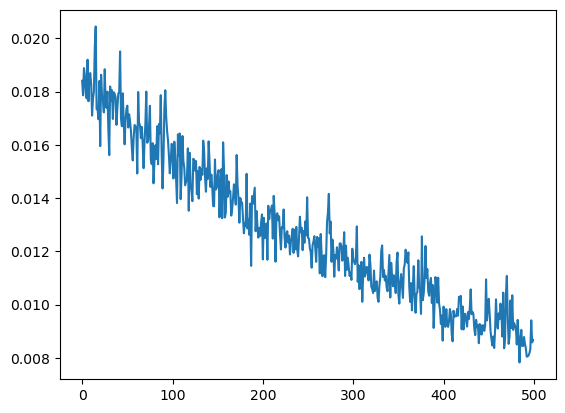

In [276]:
plt.plot(history.history['loss'])
plt.show()

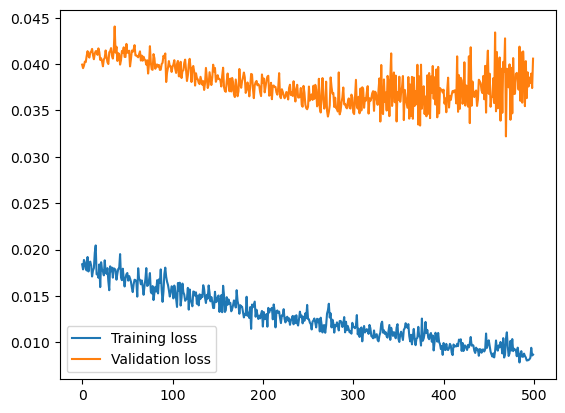

In [277]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [279]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (0, 4, 2)
X_test (217, 4, 2)
Y_train (0, 1)
Y_test (217, 1)


In [280]:
Y_pred = model.predict(X_test)

7/7 [==============================] - 0s 5ms/step


In [281]:
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', training_set_scaled.shape)

y_predicted (217, 1)
X_test (217, 4, 2)
scaled Values shape (221, 2)


In [282]:
d = training_set_scaled[:217,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:2107,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:217,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (217, 2)
Y_pred (217, 1)
concat y_pred (217, 1)
concat Y_test (217, 1)


In [283]:
Y_predicted = sc.inverse_transform(Y_predicted)
Y_tested = sc.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (217, 1)
Y_predicted (217, 1)


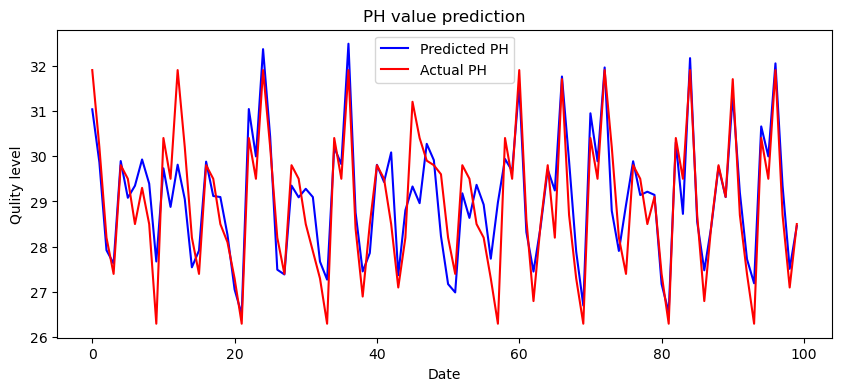

<Figure size 640x480 with 0 Axes>

In [302]:
plt.figure(figsize=(10,4))  
plt.plot(Y_predicted[:100,:], color= 'blue',label = 'Predicted PH')
plt.plot(Y_tested[:100,:] , color = 'red',label = 'Actual PH')
plt.title("PH value prediction")
plt.xlabel("Date")
plt.ylabel("Qulity level")
plt.legend()
plt.show()
plt.savefig('graph.png')